In [1]:
%matplotlib inline


In [ ]:
solowpy.CobbDouglasModel.analytic_solution?


Object `solowpy.CobbDouglasModel.analytic_solution` not found.


In [2]:
!pip install quantecon
!pip install solowpy
!pip install sympy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 KB 14.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for solowpy: filename=solowpy-0.1.3a0-py2.py3-none-any.whl size=20258 sha256=5bdb1d8f0f4fd339e28ad82ada426bbc9647b8dd582fccdca06b3ead2a900823
  Stored in directory: /root/.cache/pip/wheels/39/8a/96/0933aa58a702d32b3d85f7897a640f3ccb0dc8ca9385ec72d7
Successfully built solowpy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import random
from scipy.integrate import odeint

import quantecon as qe
import solowpy

In [ ]:
solowpy.Model.find_steady_state?

In [4]:
A, K, L = sym.symbols('A, K, L')
alpha = sym.symbols('alpha')
c = sym.symbols('c')
fonction_cobb_douglass = c * ((K)**alpha) *( (A*L)**(1-alpha))

In [5]:
p  = {'A0': 1.0, 'L0': 1.0, 'g': 0.02, 'n': 0.03, 's': 0.15,
              'delta': 0.05, 'alpha': 0.33, 'sigma': 0.95, 'c':1}

model = solowpy.CESModel(params=p)

<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in power
  return ((1.0**((sigma - 1)/sigma)*(1 - alpha) + alpha*k**((sigma - 1)/sigma))**(sigma/(sigma - 1)))


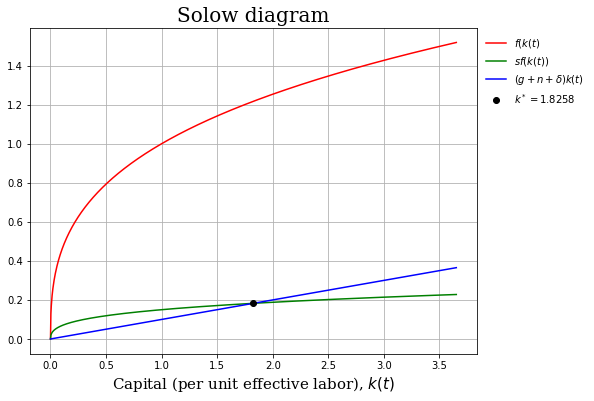

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
model.plot_solow_diagram(ax,1000)
fig.show()

<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in power
  return ((1.0**((sigma - 1)/sigma)*(1 - alpha) + alpha*k**((sigma - 1)/sigma))**(sigma/(sigma - 1)))


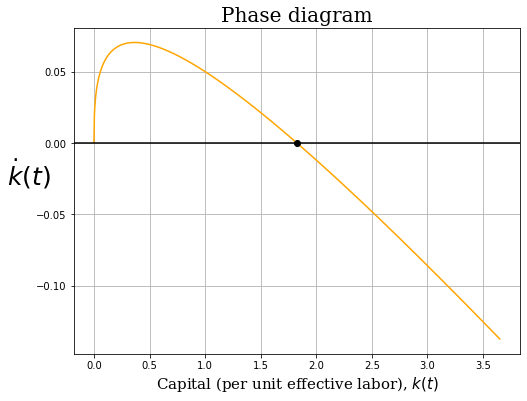

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
model.plot_phase_diagram(ax,1000)
fig.show()

In [8]:
cobb_douglas_model = solowpy.CobbDouglasModel(params=p)

Text(0.5, 1.0, 'la solution du modele de cobb douglass (k(t))')

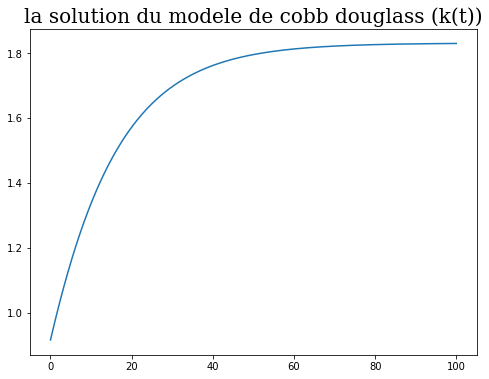

In [9]:
k0 = 0.5 *cobb_douglas_model.steady_state
t = np.linspace(0, 100, 1000)
fig, ax = plt.subplots(1, 1, figsize=(8,6))
cobb_douglas = cobb_douglas_model.analytic_solution(t, k0)
ax.plot(t,cobb_douglas[:,1])
ax.set_title('la solution du modele de cobb douglass (k(t))',
             fontsize=20, family='serif')

In [ ]:
solowpy.CobbDouglasModel.analytic_solution?

In [10]:
k0 = 0.5 * cobb_douglas_model.steady_state
print(k0)


0.9157834254023911


In [11]:
def cobb_douglas_solution(s,n,g,delta,alpha,k0,t):
  a = s / ( n + g + delta )
  b = 1 - 1/(np.exp((n+g+delta)*(1-alpha)*t))
  c = (k0)**(1-alpha)
  d = 1/ (np.exp((n+g+delta)*(1-alpha)*t))
  z = a*b + c*d
  w = z ** (1/(1-alpha))
  return w 

Text(0.5, 1.0, 'la solution du modele de cobb douglass (k(t)) lorsque on varie k0 ')

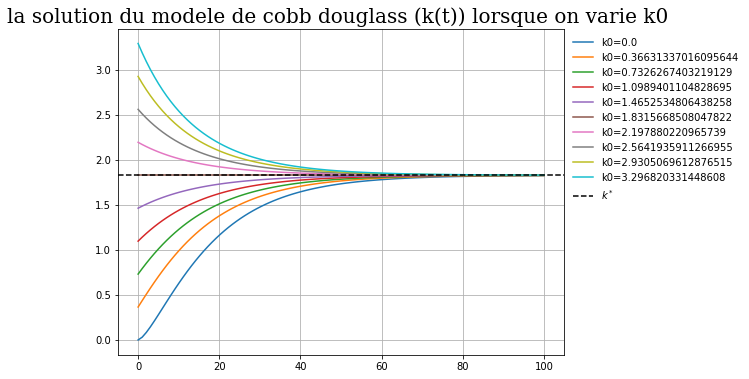

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
tab = [ i*0.1*cobb_douglas_model.steady_state for i in range(0,20,2)]
ti = np.linspace(0, 100, 100)
for k0 in tab :
  ax.plot(ti, cobb_douglas_solution(p['s'],p['n'],p['g'],p['delta'],p['alpha'],k0,ti),label=f"k0={k0}")
ax.axhline(cobb_douglas_model.steady_state, linestyle='dashed', color='k', label='$k^*$')
ax.legend(loc=0, frameon=False, bbox_to_anchor=(1.0, 1.0))
ax.grid('on')
ax.set_title('la solution du modele de cobb douglass (k(t)) lorsque on varie k0 ',
             fontsize=20, family='serif')

Text(0.5, 1.0, 'la solution du modele de cobb douglass (k(t)) lorsque on varie alpha ')

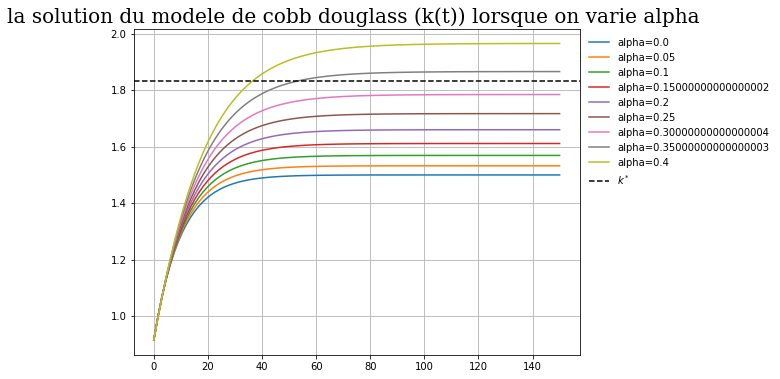

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
k0 = 0.5*cobb_douglas_model.steady_state
tab = [ i*0.05 for i in range(0,9,1)]
ti = np.linspace(0, 150, 100)
for alpha in tab :
  ax.plot(ti, cobb_douglas_solution(p['s'],p['n'],p['g'],p['delta'],alpha,k0,ti),label=f"alpha={alpha}")
ax.axhline(cobb_douglas_model.steady_state, linestyle='dashed', color='k', label='$k^*$')
ax.legend(loc=0, frameon=False, bbox_to_anchor=(1.0, 1.0))
ax.grid('on')
ax.set_title('la solution du modele de cobb douglass (k(t)) lorsque on varie alpha ',
             fontsize=20, family='serif')

In [14]:
def k_star(n,g,delta,s,sigma,alpha):
  a = ((n+g+delta)/s)**((sigma-1)/sigma) - alpha
  b = (1-alpha)/a
  c = b**(1/((sigma-1)/sigma))
  return c 

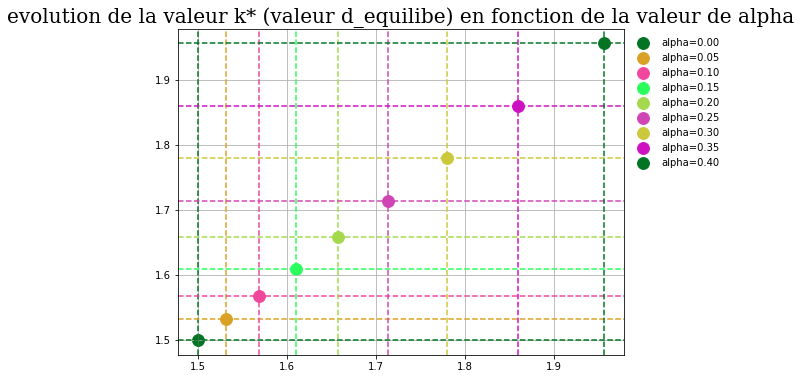

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
tab = [ i*0.05 for i in range(0,9,1)]
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(8)]
for alpha in tab :
  i = alpha * 20
  k = int(i) 
  ax.axhline(k_star(p['n'],p['g'],p['delta'],p['s'],p['sigma'],alpha),linestyle='dashed',c=color[k-1])
  ax.axvline(k_star(p['n'],p['g'],p['delta'],p['s'],p['sigma'],alpha),linestyle='dashed',c=color[k-1])
  ax.scatter(k_star(p['n'],p['g'],p['delta'],p['s'],p['sigma'],alpha),k_star(p['n'],p['g'],p['delta'],p['s'],p['sigma'],alpha),s=140,c=color[k-1],label=f"alpha={alpha:4.2f}")
  ax.set_title('evolution de la valeur k* (valeur d_equilibe) en fonction de la valeur de alpha',fontsize=20, family='serif')
  ax.legend(loc=0, frameon=False, bbox_to_anchor=(1.0, 1.0))
  ax.grid(True)

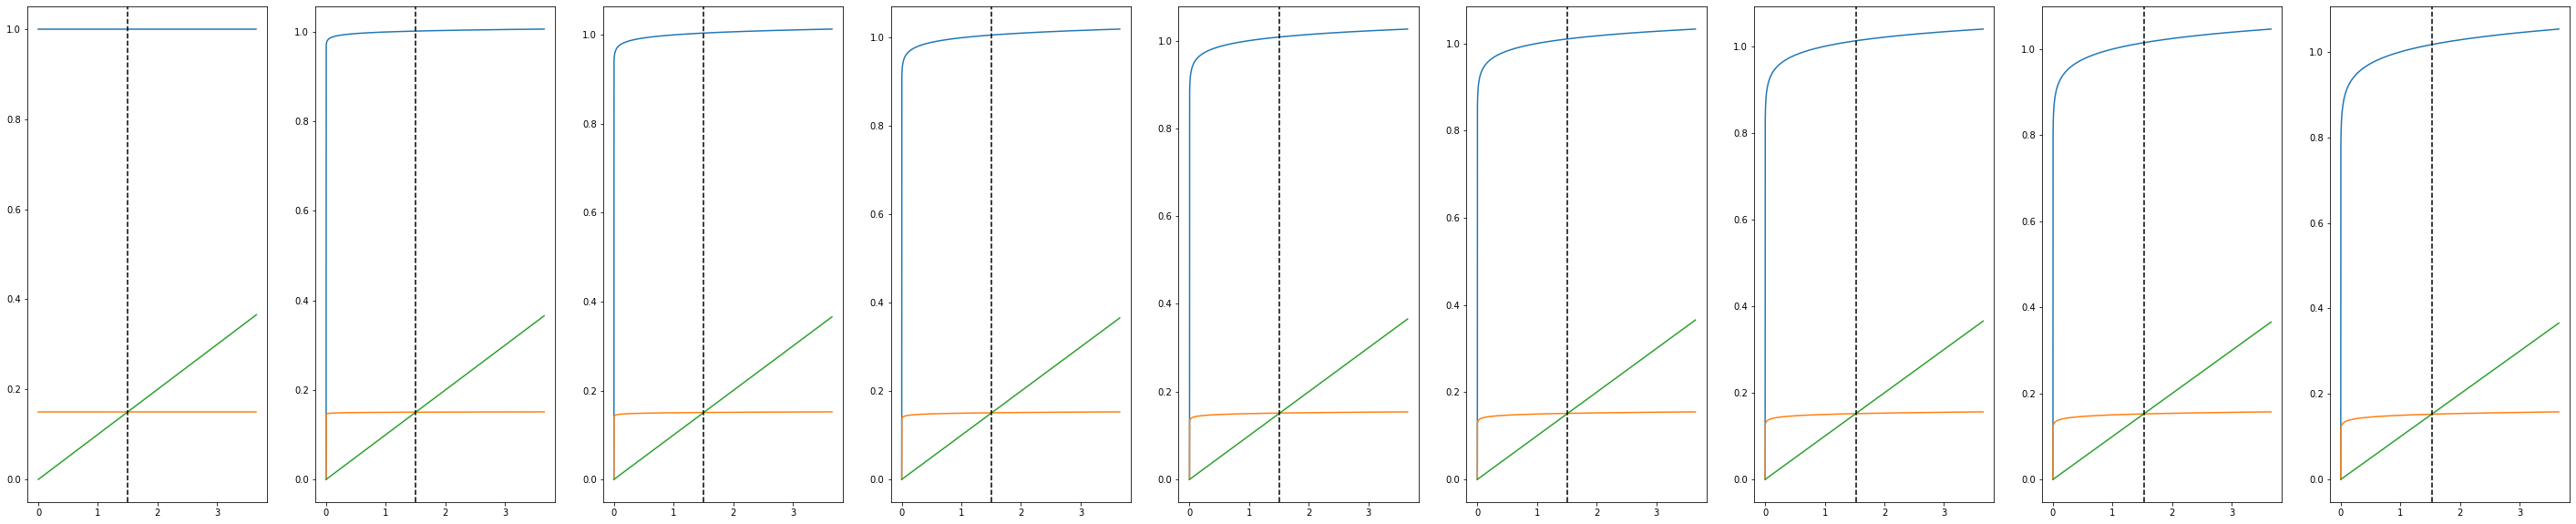

In [140]:
k0 = 0
ti = np.linspace(0, 100, 1000)
a = cobb_douglas_solution(p['s'],p['n'],p['g'],p['delta'],p['alpha'],k0,ti)*2
tab = [ i*0.005 for i in range(0,9,1)]
fig, ax = plt.subplots(1, len(tab), figsize=(50,10))
i=0
k = 4
for alpha in tab :
  i=i+1
  b = a**(alpha)
  c = p['s'] * b
  d = (p['n'] + p['g'] + p['delta'])*a
  ax[i-1].plot(a,b,label=f"f(k(t))")
  ax[i-1].plot(a,c,label=f"s*f(k(t))")
  ax[i-1].plot(a,d,label=f"(n+g+delta)*k(t)")
  ax[i-1].axvline(k_star(p['n'],p['g'],p['delta'],p['s'],p['sigma'],alpha),linestyle='dashed',color="black")




